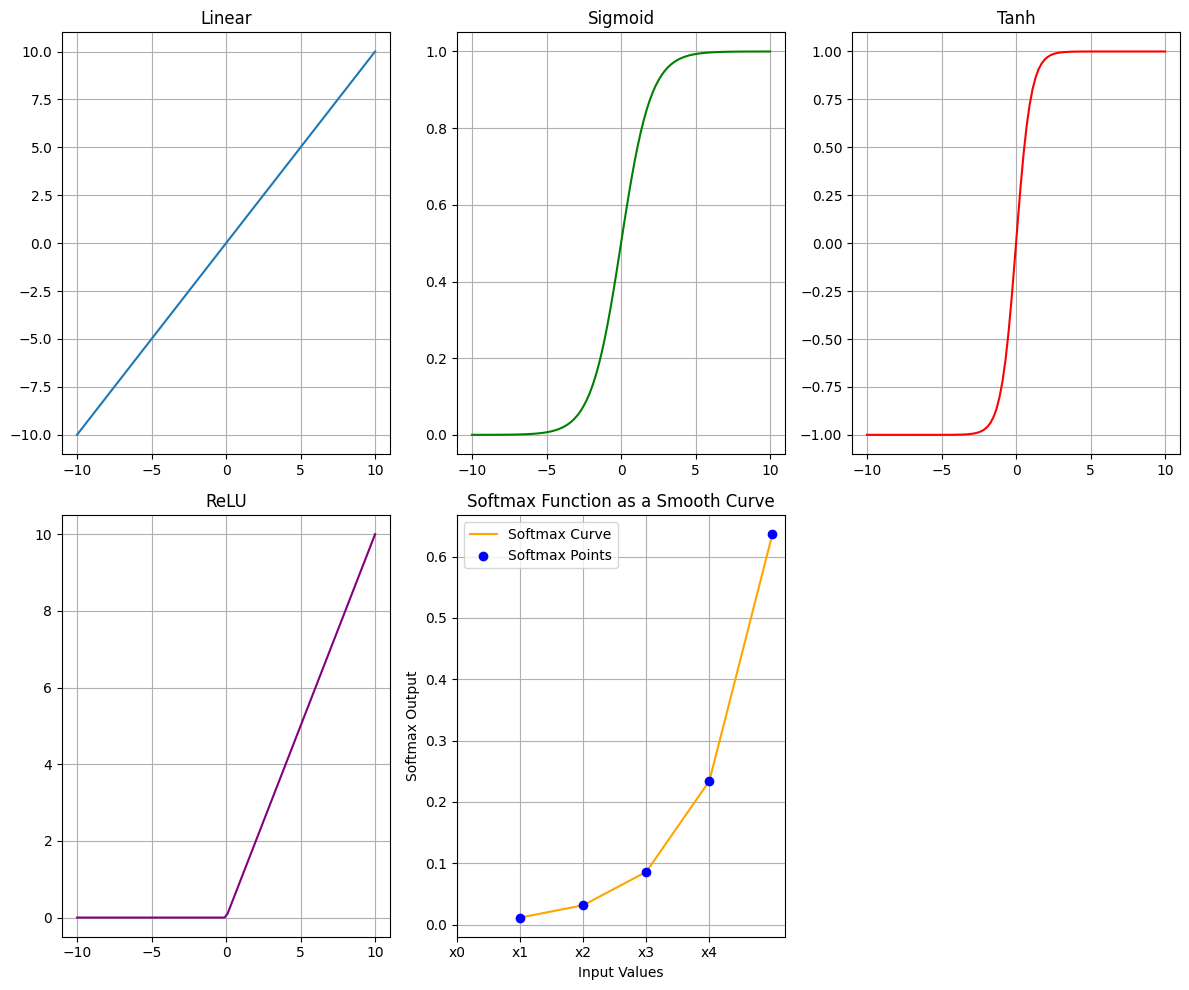

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions
def linear(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return e_x / e_x.sum(axis=0)

# Input range for plotting
x = np.linspace(-10, 10, 100)

# Apply activation functions
y_linear = linear(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)

# For softmax, we need a vector input, usually used across a layer, not element-wise
x_softmax = np.array([1.0, 2.0, 3.0, 4.0, 5.0])  # Example vector
y_softmax = softmax(x_softmax)

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.plot(x, y_linear, label='Linear')
plt.title("Linear")
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, y_sigmoid, label='Sigmoid', color='green')
plt.title("Sigmoid")
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, y_tanh, label='Tanh', color='red')
plt.title("Tanh")
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, y_relu, label='ReLU', color='purple')
plt.title("ReLU")
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x_softmax, y_softmax, color='orange', label='Softmax Curve')
plt.scatter(x_softmax, y_softmax, color='blue', label='Softmax Points', zorder=5)  # Original points
plt.title("Softmax Function as a Smooth Curve")
plt.xlabel("Input Values")
plt.ylabel("Softmax Output")
plt.xticks(np.arange(0, 5, 1), [f"x{i}" for i in range(5)])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

# Build a single-layer perceptron model (no hidden layers)
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 784-dim vectors
    Dense(10, activation='softmax')  # Output layer with 10 neurons (0-9 digits)
])

# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_categorical, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6878 - loss: 1.2029 - val_accuracy: 0.8955 - val_loss: 0.4518
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8717 - loss: 0.4997 - val_accuracy: 0.9083 - val_loss: 0.3664
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8848 - loss: 0.4298 - val_accuracy: 0.9138 - val_loss: 0.3337
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8931 - loss: 0.3930 - val_accuracy: 0.9172 - val_loss: 0.3149
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8981 - loss: 0.3715 - val_accuracy: 0.9190 - val_loss: 0.3023
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8999 - loss: 0.3604 - val_accuracy: 0.9215 - val_loss: 0.2933
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9021 - loss: 0.3520 - val_accuracy: 0.9212 - val_loss: 0.2869
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9039 - loss: 0.3461 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


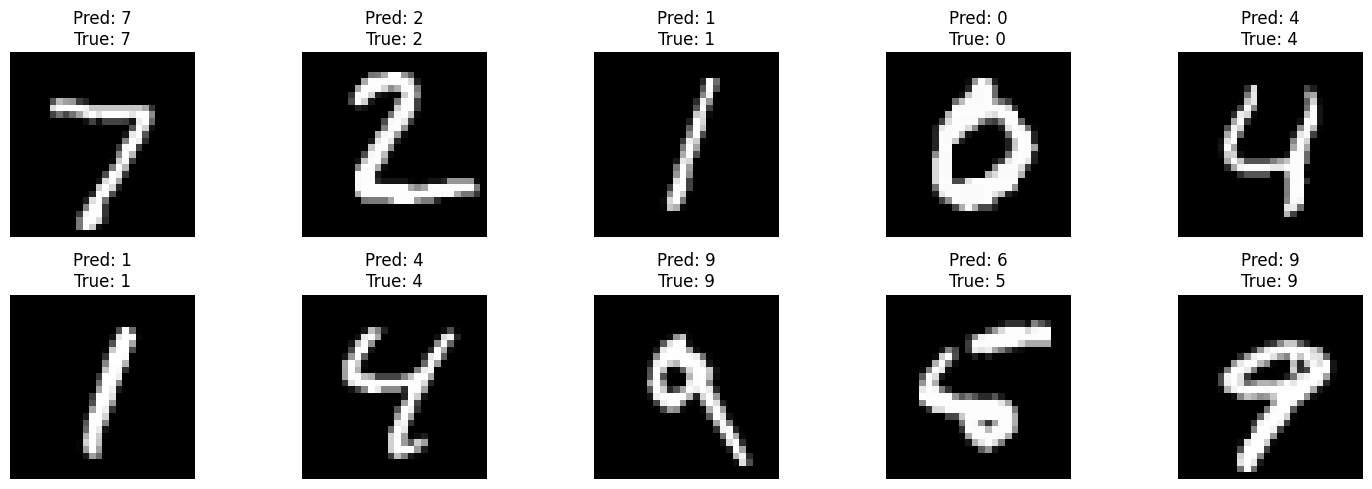

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict the class probabilities
predictions = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display a few test images with predictions
num_images = 10
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [1]:
import numpy as np

# Define activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# OR gate dataset
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

labels = np.array([0, 1, 1, 1])

# Initialize weights
weights = np.array([1.6, 1.2]) # Starting with the fixed weights
learning_rate = 0.1 # Need a learning rate for updates

print("Updating weights for OR Gate Perceptron without bias:")
print("Initial weights:", weights)

for i in range(len(inputs)):
    x = inputs[i]
    y = labels[i]

    # Weighted sum (without bias)
    z = np.dot(weights, x)

    # Activation
    y_pred = step_function(z)

    # Error
    error = y - y_pred

    # Update rule (without bias)
    weights += learning_rate * error * x

    print(f"Input: {x}, Predicted: {y_pred}, True: {y}, Updated Weights: {weights}")

# Final model
print("\nFinal weights:", weights)

# Testing the trained perceptron with final weights (without bias)
print("\nTesting OR Gate Perceptron with final weights (without bias):")
for x in inputs:
    z = np.dot(weights, x)
    y_pred = step_function(z)
    print(f"Input: {x}, Output: {y_pred}")

Updating weights for OR Gate Perceptron without bias:
Initial weights: [1.6 1.2]
Input: [0 0], Predicted: 1, True: 0, Updated Weights: [1.6 1.2]
Input: [0 1], Predicted: 1, True: 1, Updated Weights: [1.6 1.2]
Input: [1 0], Predicted: 1, True: 1, Updated Weights: [1.6 1.2]
Input: [1 1], Predicted: 1, True: 1, Updated Weights: [1.6 1.2]

Final weights: [1.6 1.2]

Testing OR Gate Perceptron with final weights (without bias):
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


In [ ]:
import numpy as np

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# AND gate dataset
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

labels = np.array([0, 0, 0, 1])  # Expected output for AND gate

# Initialize weights and bias
weights = np.array([0.6, 0.6])
bias = -0.5
learning_rate = 0.1

print("Using fixed bias and updating weights for AND Gate Perceptron:")
print("Initial weights:", weights)
print("Initial bias:", bias)

for i in range(len(inputs)):
    x = inputs[i]
    y = labels[i]

    # Compute weighted sum
    z = np.dot(weights, x) + bias

    # Apply activation function
    y_pred = step_function(z)

    # Error
    error = y - y_pred

    # Update rule (without bias update)
    weights += learning_rate * error * x

    print(f"Input: {x}, Predicted: {y_pred}, True: {y}, Updated Weights: {weights}")

# Final model
print("\nFinal weights:", weights)
print("Final bias:", bias)

# Testing the trained perceptron with final weights and initial bias
print("\nTesting AND Gate Perceptron with final weights and initial bias:")
for x in inputs:
    z = np.dot(weights, x) + bias
    y_pred = step_function(z)
    print(f"Input: {x}, Output: {y_pred}")

Using fixed bias and updating weights for AND Gate Perceptron:
Initial weights: [0.6 0.6]
Initial bias: -0.5
Input: [0 0], Predicted: 0, True: 0, Updated Weights: [0.6 0.6]
Input: [0 1], Predicted: 1, True: 0, Updated Weights: [0.6 0.5]
Input: [1 0], Predicted: 1, True: 0, Updated Weights: [0.5 0.5]
Input: [1 1], Predicted: 1, True: 1, Updated Weights: [0.5 0.5]

Final weights: [0.5 0.5]
Final bias: -0.5

Testing AND Gate Perceptron with final weights and initial bias:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


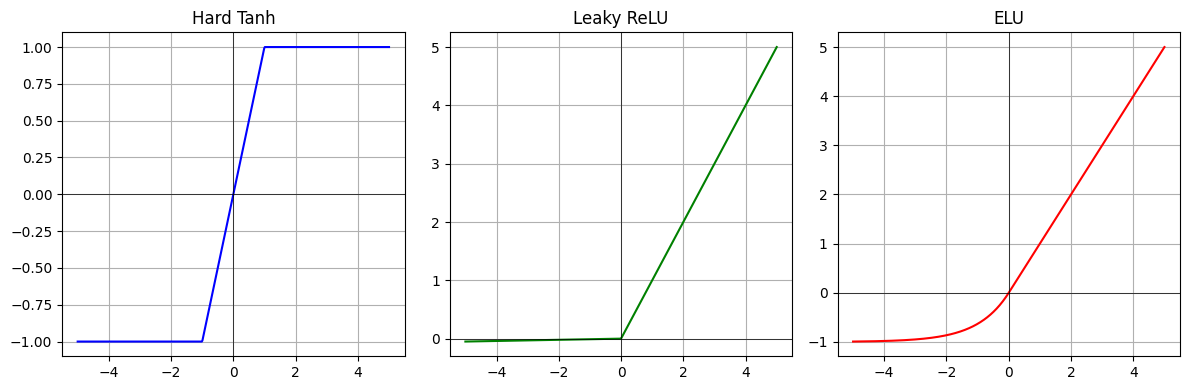

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions

def hard_tanh(x):
    return np.clip(x, -1, 1)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

# Generate input values
x = np.linspace(-5, 5, 500)

# Compute activations
y_hard_tanh = hard_tanh(x)
y_leaky_relu = leaky_relu(x)
y_elu = elu(x)

# Plotting
plt.figure(figsize=(12, 4))

# Hard Tanh
plt.subplot(1, 3, 1)
plt.plot(x, y_hard_tanh, label="Hard Tanh", color='blue')
plt.title("Hard Tanh")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Leaky ReLU
plt.subplot(1, 3, 2)
plt.plot(x, y_leaky_relu, label="Leaky ReLU", color='green')
plt.title("Leaky ReLU")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# ELU
plt.subplot(1, 3, 3)
plt.plot(x, y_elu, label="ELU", color='red')
plt.title("ELU")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# NAND gate inputs and outputs
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

labels = np.array([1, 1, 1, 0])  # Expected output for NAND gate

# Initialize weights and bias
weights = np.zeros(2)
bias = 0
learning_rate = 0.1
epochs = 10

# Training the perceptron
for epoch in range(epochs):
    print(f"Epoch {epoch+1}")
    for i in range(len(inputs)):
        x = inputs[i]
        y = labels[i]

        # Weighted sum
        z = np.dot(weights, x) + bias

        # Activation
        y_pred = step_function(z)

        # Error
        error = y - y_pred

        # Update rule
        weights += learning_rate * error * x
        bias += learning_rate * error

        print(f"Input: {x}, Predicted: {y_pred}, True: {y}, Weights: {weights}, Bias: {bias}")

# Final model
print("\nFinal weights:", weights)
print("Final bias:", bias)

# Testing the trained perceptron
print("\nTesting NAND Gate Perceptron:")
for x in inputs:
    z = np.dot(weights, x) + bias
    y_pred = step_function(z)
    print(f"Input: {x}, Output: {y_pred}")


Epoch 1
Input: [0 0], Predicted: 1, True: 1, Weights: [0. 0.], Bias: 0.0
Input: [0 1], Predicted: 1, True: 1, Weights: [0. 0.], Bias: 0.0
Input: [1 0], Predicted: 1, True: 1, Weights: [0. 0.], Bias: 0.0
Input: [1 1], Predicted: 1, True: 0, Weights: [-0.1 -0.1], Bias: -0.1
Epoch 2
Input: [0 0], Predicted: 0, True: 1, Weights: [-0.1 -0.1], Bias: 0.0
Input: [0 1], Predicted: 0, True: 1, Weights: [-0.1  0. ], Bias: 0.1
Input: [1 0], Predicted: 1, True: 1, Weights: [-0.1  0. ], Bias: 0.1
Input: [1 1], Predicted: 1, True: 0, Weights: [-0.2 -0.1], Bias: 0.0
Epoch 3
Input: [0 0], Predicted: 1, True: 1, Weights: [-0.2 -0.1], Bias: 0.0
Input: [0 1], Predicted: 0, True: 1, Weights: [-0.2  0. ], Bias: 0.1
Input: [1 0], Predicted: 0, True: 1, Weights: [-0.1  0. ], Bias: 0.2
Input: [1 1], Predicted: 1, True: 0, Weights: [-0.2 -0.1], Bias: 0.1
Epoch 4
Input: [0 0], Predicted: 1, True: 1, Weights: [-0.2 -0.1], Bias: 0.1
Input: [0 1], Predicted: 1, True: 1, Weights: [-0.2 -0.1], Bias: 0.1
Input: [1 0],